In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy import signal
%matplotlib inline

In [57]:
data = pd.read_csv("default.csv", sep=",", header=0)
data.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


/home/justin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


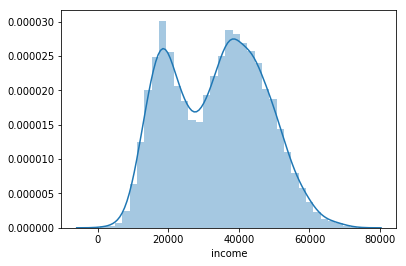

In [49]:
sns.distplot(data["income"])

### Calculate local maxima for income

In [58]:
maxindices = signal.argrelextrema(data["income"].values, np.greater_equal)[0]
local_maxima = np.median(data["income"].values[maxindices])

### Calculate local minima for income

In [59]:
minindices = signal.argrelextrema(data["income"].values, np.less_equal)[0]
local_minima = np.median(data["income"].values[minindices])

In [60]:
print(local_maxima)
print(local_minima)

45385.3113268622
19541.0460996816


### Insert local maxima and minima as columns 

In [61]:
data["local_maxima"] = local_maxima
data["local_minima"] = local_minima

In [62]:
data.head()

,default,student,balance,income,local_maxima,local_minima
0,No,No,729.526495,44361.625074,45385.311327,19541.0461
1,No,Yes,817.180407,12106.134700,45385.311327,19541.0461
2,No,No,1073.549164,31767.138947,45385.311327,19541.0461
3,No,No,529.250605,35704.493935,45385.311327,19541.0461
4,No,No,785.655883,38463.495879,45385.311327,19541.0461


#### Calculate proximity for each income value to the maxima as well as minima

In [63]:
data["proximity_maxima"] = data.apply(lambda row: abs(row["income"]-row["local_maxima"]), axis=1)
data["proximity_minima"] = data.apply(lambda row: abs(row["income"]-row["local_minima"]), axis=1)

In [64]:
data.head()

,default,student,balance,income,local_maxima,local_minima,proximity_maxima,proximity_minima
0,No,No,729.526495,44361.625074,45385.311327,19541.0461,1023.686253,24820.578975
1,No,Yes,817.180407,12106.134700,45385.311327,19541.0461,33279.176627,7434.911399
2,No,No,1073.549164,31767.138947,45385.311327,19541.0461,13618.172379,12226.092848
3,No,No,529.250605,35704.493935,45385.311327,19541.0461,9680.817392,16163.447835
4,No,No,785.655883,38463.495879,45385.311327,19541.0461,6921.815448,18922.449779


#### Determine if the income is nearer to minima or maxima. 
* Our assumption/prior knowledge is that income values for students will be on the lower side and non students will have their incomes in the higher range. Hence, if the income value is nearer to minima, we classify it as a student's income and vice versa. That means, proximity_minima is lesser than proximity_maxima.

In [36]:
def mark_income_class (proximity_maxima, proximity_minima):
    
    if (proximity_minima < proximity_maxima):
        return "Yes"
    
    return "No"


In [65]:
data["income_class_student"] = data.apply(lambda row: mark_income_class (row["proximity_maxima"], row["proximity_minima"]), axis=1)

In [66]:
data.head()

,default,student,balance,income,local_maxima,local_minima,proximity_maxima,proximity_minima,income_class_student
0,No,No,729.526495,44361.625074,45385.311327,19541.0461,1023.686253,24820.578975,No
1,No,Yes,817.180407,12106.134700,45385.311327,19541.0461,33279.176627,7434.911399,Yes
2,No,No,1073.549164,31767.138947,45385.311327,19541.0461,13618.172379,12226.092848,Yes
3,No,No,529.250605,35704.493935,45385.311327,19541.0461,9680.817392,16163.447835,No
4,No,No,785.655883,38463.495879,45385.311327,19541.0461,6921.815448,18922.449779,No


#### Calculate True Positives (TP), True Negatives (TN), False Positives (FP) and False Negatives (FN)

In [44]:
data["true_positive"] = data.apply(lambda row: 1 if ((row["income_class_student"]=='Yes') and (row["student"]=='Yes')) 
                                   else 0, axis=1 )
data["true_negative"] = data.apply(lambda row: 1 if ((row["income_class_student"]=='No') and (row["student"]=='No')) 
                                   else 0, axis=1 )
data["false_positive"] = data.apply(lambda row: 1 if ((row["income_class_student"]=='Yes') and (row["student"]=='No')) 
                                   else 0, axis=1 )
data["false_negative"] = data.apply(lambda row: 1 if ((row["income_class_student"]=='No') and (row["student"]=='Yes')) 
                                   else 0, axis=1 )

In [45]:
TP = data["true_positive"].sum()
TN = data["true_negative"].sum()
FP = data["false_positive"].sum()
FN = data["false_negative"].sum()

In [67]:
print(TP)
print(TN)
print(FP)
print(FN)

2941
5490
1566
3


#### Calculate Accuracy, Precision, Recall and F1 score

In [53]:
accuracy  = (TP+TN)/(TP+FP+FN+TN)
precision = TP/(TP+FP)
recall    = TP/(TP+FN)
f1 = 2* (precision * recall)/(precision+recall)

In [55]:
print("Accuracy: {}".format(accuracy))
print ("Precision: {}".format(precision))
print("Recall: {}".format(recall))
print("F1 score: {}".format(f1))

Accuracy: 0.8431
Precision: 0.6525404925671178
Recall: 0.9989809782608695
F1 score: 0.7894242383572674
